<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  from google.colab import drive 
  drive.mount('/content/gdrive')
  path = "gdrive/My Drive/COMP30027 (T) 2023/week11/"
except:
  path = ''

Mounted at /content/gdrive


######  The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 Semester 1

## Week 11 - Neural Networks

Why you may want to attend:
- The reason 69% of the students enrolled in this subject 👌
- Some cool terminology that you can use to flex today:
  - Multi-Layer Perceptron
  - Standardization
  - Pipeline
  - Hyperparameter Tuning with Grid Search
- It is examinable (oh no!)

___

# Theoretical questions


# 1. The perceptron is closely related to logistic regression. Explain the condition(s) under which both are equivalent. 

- Both's output is the weighted sum of input features
- The sum value is then put through an activation function
  - In perceptron it can be any, step function is one of them
  - In logistic regression it is sigmoid function
- Loss function: 
  - LR uses cross-entropy loss (log-likelihood)
  - Perception just counts errors by default

So they are equivalent if sigmoid activation function and cross-entropy loss is used.

Some difference to note: The Perceptron and Logistic Regression also have different learning mechanisms (but this difference doesn't impact the equivalence of the models).
- For Logistic regression, weights are typically updated after all the training instances have been processed (after one full iteration). However, we could also apply batch gradient descent -- updating weights after a subset of instances have been observed (and the subset can be as small as 1 instance).
- The Perceptron by definition updates its weights after processing each instance. So the weights (𝜃) are updated several times in each iteration over the training data.  

<img src='https://img.ifunny.co/images/5f5eef4e71f2c71dc2500878169d54450259e444672e03ffeb7a4f2e6aa072a9_1.jpg' height=200/>

## 2. Consider the initial weight function as $𝑤=\{𝑤_0,𝑤_1,𝑤_2\} = \{0.2, -0.4, 0.1\}$, the  bias of 1 and the activation function of the perceptron as the step function of `f = int(sum > 0)` 

($x_1$,$x_2$)|y
---|---
(0,0)|0
(0,1)|1
(1,1)|1

### a. Draw the perceptron graph and calculate the accuracy of the perceptron on the training data before training?

[![](https://mermaid.ink/img/pako:eNo9kMEOgjAMhl9l6QkTSITjDiaieNKLHp2HyaosymbGiBLgaXwfn8nBxJ7aL1-T_m0h1wKBwuWun3nBjSXbPVNVfb4a_ijIZsJMCWkwt1Kr0SCulkE8I1G06J7zjqTHz_vkeTpAsmqb3s_r4DWJsRM9zIJX8oPJH6ISEEKJpuRSuKvaATOwBZbIgLpWcHNjwFTvvPohuMVMSKsN0Au_VxgCr60-NCoHak2Nk7SW3AUq_xaOSzuffXxB_wVdKVWn?type=png)](https://mermaid.live/edit#pako:eNo9kMEOgjAMhl9l6QkTSITjDiaieNKLHp2HyaosymbGiBLgaXwfn8nBxJ7aL1-T_m0h1wKBwuWun3nBjSXbPVNVfb4a_ijIZsJMCWkwt1Kr0SCulkE8I1G06J7zjqTHz_vkeTpAsmqb3s_r4DWJsRM9zIJX8oPJH6ISEEKJpuRSuKvaATOwBZbIgLpWcHNjwFTvvPohuMVMSKsN0Au_VxgCr60-NCoHak2Nk7SW3AUq_xaOSzuffXxB_wVdKVWn)

($x_1$,$x_2$)|$0.2$-$0.4x_1$+$0.1x_2$|$\hat{y}$|y
---|---|---|---
(0,0)|0.2|1|0
(0,1)|0.3|1|1
(1,1)|-0.1|0|1

Accuracy = 1/3 

### b. Using the perceptron learning rule and the learning rate of 𝜆=0.2. Train the perceptron for one epoch. What are the weights after the training?


Update: $w_i$ += $𝜆(𝑦−\hat{𝑦})𝑥_i$

($x_1$,$x_2$)|$w_0$ + $w_1x_1$ + $w_2x_2$|$\hat{y}$|y| w0 | w1 | w2
---|---|---|---|---|---|---|
(0,0)|0.2 - 0.4 x 0 + 0.1 x 0 = 0.2|1|0| 0.2 + 0.2 (0−1) 1 = 0 | −0.4 + 0.2 x (0−1) x 0= −0.4 | 0.1 + 0.2 x (0−1) x 0 = 0.1
(0,1)|0 – 0.4 x 0 + 0.1 x 1 = 0.1|1|1|No need to update|
(1,1)|???|

Can you try the 3rd row?

($x_1$,$x_2$)|$w_0$ + $w_1x_1$ + $w_2x_2$|$\hat{y}$|y| w0 | w1 | w2
---|---|---|---|---|---|---|
(0,0)|0.2 - 0.4 x 0 + 0.1 x 0 = 0.2|1|0| 0.2 + 0.2 (0−1) 1 = 0 | −0.4 + 0.2 x (0−1) x 0= −0.4 | 0.1 + 0.2 x (0−1) x 0 = 0.1
(0,1)|0 – 0.4 x 0 + 0.1 x 1 = 0.1|1|1|No need to update
(1,1)|0 – 0.4 x 1 + 0.1 x 1 = – 0.3|0|1|0.2|-0.2|0.3

### c. What is the accuracy of the perceptron on the training data after training for one epoch? Did the accuracy improve?  

($x_1$,$x_2$)|$0.2$-$0.2x_1$+$0.3x_2$|$\hat{y}$|y
---|---|---|---
(0,0)|0.2|1|0
(0,1)|0.5|1|1
(1,1)|0.1|1|1

2/3 accuracy, improved from 1/3

## 3. 
> Consider the two layers deep network illustrated below. It is composed of three perceptrons. The two perceptrons of the first layer implement the AND and OR function, respectively. 

[![](https://mermaid.ink/img/pako:eNp1kN1qwkAQhV9lmastGKhe5qKgJi2F_oBeur0Ys2OzNNmVzS4qMU_j-_hM3ZjUINi5mjnfOQycGjIjCWLYFGaX5Wgde1sIzcJUfv1tcZuz16LwlbPolNEdkspS1p5XcztTzqLxA4uip-Pu8chmq_Ppa6CzFrB5fWgGLeHTj6RPjENiICn_XPRgcgOe-b77kQzaC99P_tXSO9leIy1hBCXZEpUMHdStLMDlVJKAOKwS7Y8AoZvg81uJjlKpnLEQb7CoaATonVkedAaxs57-TInCUF15ddEl9N41fSm8-QWk4mqT?type=png)](https://mermaid.live/edit#pako:eNp1kN1qwkAQhV9lmastGKhe5qKgJi2F_oBeur0Ys2OzNNmVzS4qMU_j-_hM3ZjUINi5mjnfOQycGjIjCWLYFGaX5Wgde1sIzcJUfv1tcZuz16LwlbPolNEdkspS1p5XcztTzqLxA4uip-Pu8chmq_Ppa6CzFrB5fWgGLeHTj6RPjENiICn_XPRgcgOe-b77kQzaC99P_tXSO9leIy1hBCXZEpUMHdStLMDlVJKAOKwS7Y8AoZvg81uJjlKpnLEQb7CoaATonVkedAaxs57-TInCUF15ddEl9N41fSm8-QWk4mqT)

> Determine the weights w1, w2 and bias w0 such that the network implements the XOR function. The initial weights are set to zero, i.e., w0 = w1 = w2 = 0, and the learning rate 𝜆 (lambda) is set to 0.1.

x1|x2|(x1 & x2) XOR (x1 \| x2)
---|---|---
1|0|1
0|1|1
1|1|0
0|0|0

Epoch 1:

x1|x2|z = w.X|$\hat{y}$=f(z)|y|Weight update
---|---|---|---|---|---
1|0|0 x (-1) + 0 x 0 + 0 x 1 = 0|0|1| (0, 0, 0) + 0.1 x (1-0) x (-1, 0, 1) = (-0.1, 0, 0.1)
0|1|(-0.1) x -1 + 0 x 0 + (0.1) x 1 = 0.2 | 1 | 1 | No
1|1|(-0.1) x -1 + 0 x 1 + (0.1) x 1 = 0.2 | 1 | 0 | (-0.1, 0, 0.1) + 0.1 x (0-1) x (-1, 1,1) = (0, -0.1, 0)
0|0|0 x -1 + (-0.1) x 0 + 0 x 0 = 0 | 0|0|No

Epoch 2,3,4 (sorry I'm lazy 😁):

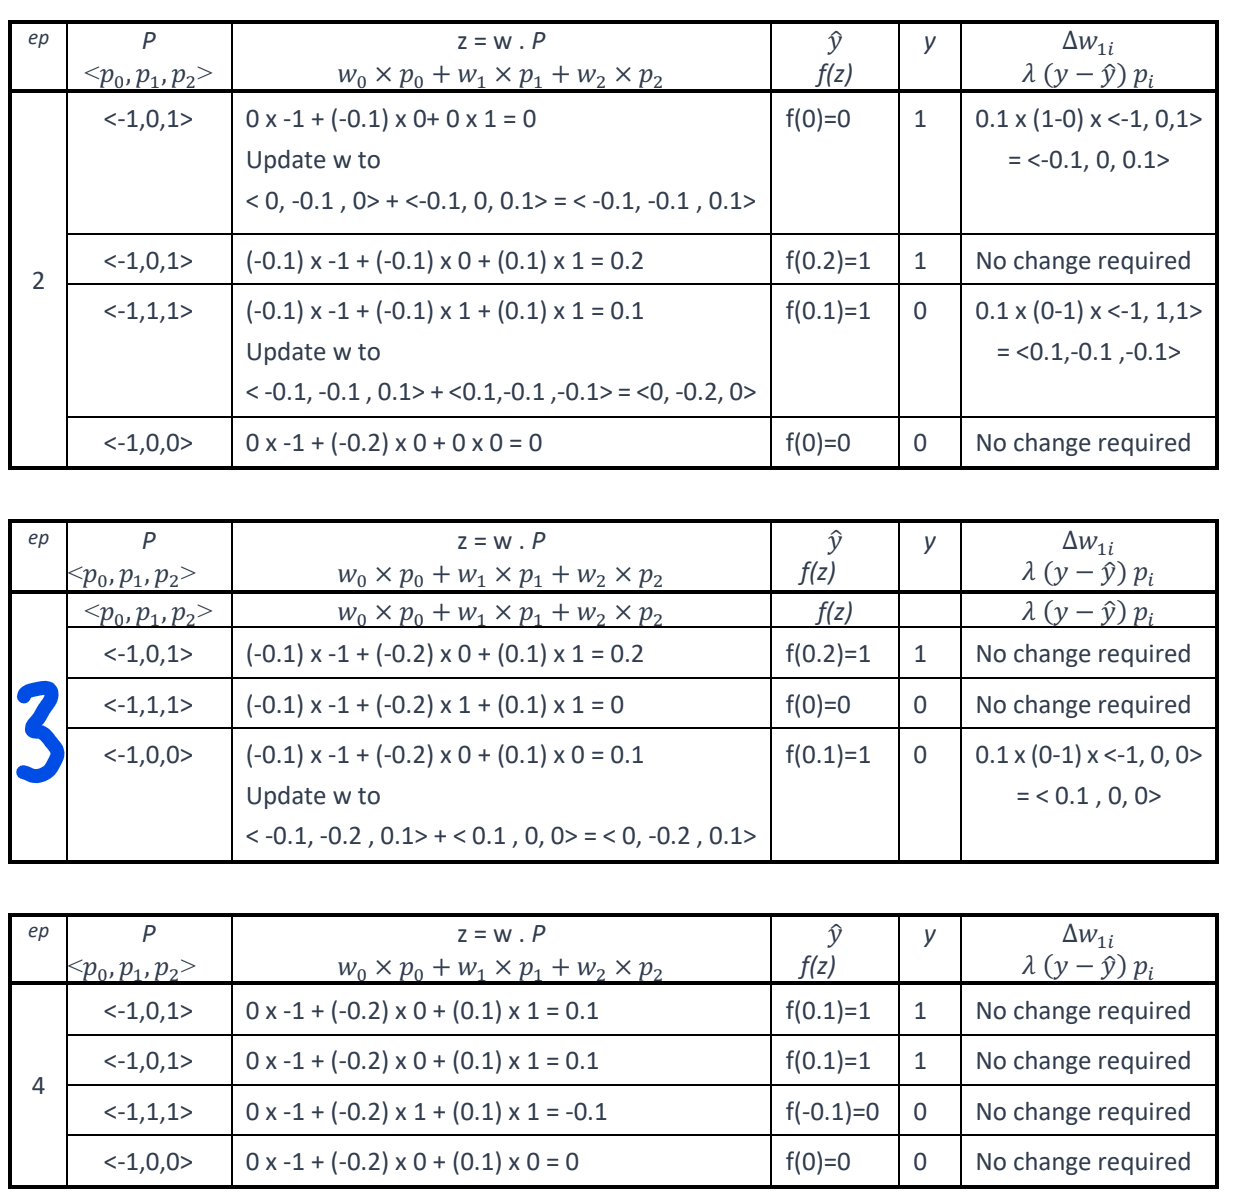

No more updates ▶ Converge at weights <0, -0.2 , 0.1>


## 4. Why is a neural network suitable for deep learning? What is significant about the representation that we attempt to learn? 

Hypothetically, the weights across the network describe some useful properties of the input attributes. In effect, we hope to auto–magically engineer the necessary features to solve our problem, based only on the simplest inputs (where we hopefully haven’t already introduced a bias). 

The most interesting about the representation is that it is simultaneously useful for solving the problem and un-interpretable by humans. Although the claims of the automaton “learning” are probably over–blown, it can indeed discover properties of the data that were previously unknown to be useful (given enough data). 

The subsequent “embedding” (weights of the final hidden layer of neurons) can also be used as a dense instance representation, which is sometimes helpful in unexpected problems.

## 5. Describe the mathematical formula of a multilayer perceptron with 1 hidden layer. Assume the input size is 1000, the hidden layer size is 100, and the output size is 20. Identify the parameters of the model, and their size.  

Function: $g(x) = 𝑓_2[𝑓_1(𝑥.𝑤_1+𝑏_1).𝑤_2+𝑏_2]$
- Input and weights
  - $x ∈ (1, 1000)$
  - $𝑤_1 ∈ (1000, 100)$
  - $𝑤_2 ∈ (100, 20)$
- Bias term:
  - $b_1 ∈ (1, 100)$
  - $b_2 ∈ (1, 20)$
- Activation functions:
  - $𝑓_1$ is an activation function such as ReLU or tanh
  - $𝑓_2$ is softmax

---
# Coding exercises

### NOTE:  You will need the newer (18.1) build of `scikit-learn` for its neural network support.


### Exercise 1.
The Multilayer Perceptron is available from (newer builds of) `scikit-learn` as `sklearn.neural_network.MLPClassifier`.


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from collections import Counter

### Exercise 1.(a) 
Build a default Multilayer Perceptron to classify the `Iris` data. Evaluate its cross-validation accuracy.

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('X:', X.shape, 'y:', set(y))


clf = MLPClassifier(max_iter=2000)

print('corss-val acc:', np.mean(cross_val_score(clf, X, y, cv=5)))
clf.fit(X, y)


X: (150, 4) y: {0, 1, 2}
corss-val acc: 0.9800000000000001


MLPClassifier(max_iter=2000)

### Exercise 1.(b) 
Check the `coefs_` and `n_layers_` attributes of the fitted classifier to examine the resulting neural network.

In [ ]:
#print(clf.coefs_)
print('parameter shapes:',[p.shape for p in clf.coefs_])
print('num layers:', clf.n_layers_)

parameter shapes: [(4, 100), (100, 3)]
num layers: 3


### Exercise 2.
One important issue with this Multilayer Perceptron is that it is sensitive to the scale of the input attribute values.
### Exercise 2.(a) Standardization
Read up on the `StandardScaler` , and re-scale the `Iris` data so that each attribute has a *mean* of 0 and a *variance* of 1. Evaluate and examine the resulting neural network built on the re-scaled data.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clf = MLPClassifier(max_iter=2000)
#it is cheating because the mean and variance are estimated using both training and test data
print('Cross-val cheating standardised features acc:', np.mean(cross_val_score(clf, scaler.fit_transform(X), y, cv=5))) 


Cross-val cheating standardised features acc: 0.9666666666666668


Why is it not good?

*Because by scaling the whole dataset, you would have put a bit of test info to the training process. It's like peeping a few card in the deck.*

- Solution? Just do it after splitting!
- ToO mAny sTEpS? Here comes Pipeline Perri!

<details>
<summary>Pipeline Perri can fit multiple models at once.</summary>
<s>Just like their cousin Piper Perri.</s>
</details>

> The Pipeline is built using a list of `(key, value)` pairs, where the key is a string containing the name you want to give this step and value is an estimator object:
```python
from sklearn.pipeline import Pipeline
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
```
If you don't need to name them:
```python
from sklearn.pipeline import make_pipeline
make_pipeline(Binarizer(), MultinomialNB())
```


### Exercise 2.(c) 
(Harder) Calculating the _mean_ and _variance_ on the entire data set (before splitting into train/test sets) is cheating slightly. Write a re-scale function that calculates the scaling factors for the training data, and applies the scaler to the test data. Then, write a wrapper function that uses this to cross-validate.



In [ ]:
clf = MLPClassifier(max_iter=2000)
#this way we don't cheat. Read more on pipelines https://scikit-learn.org/stable/modules/compose.html
pipeline = Pipeline([('transformer', scaler), ('estimator', clf)])
print('Cross-val noncheating standardised features acc:', np.mean(cross_val_score(pipeline, X, y, cv=5)))


Cross-val noncheating standardised features acc: 0.9666666666666668


*You might not see reduction in performance for the noncheating method, but in general it is best to standardise only the training data (`fit_transform`), and then apply the transformation to the test data (`transform`).*

*Also you didn't see improvements with standardisation, which might be the result of the neural network not being tuned well in terms of regularisation, and number/size of the layers.*

### Exercise 3 
You can coerce the Multilayer Perceptron to have specifically–sized hidden layers using the `hidden_layer_sizes` parameter.
### Exercise 3.(a) 
Train a Multilayer Perceptron on the two-class `Abalone` data, and examine the resulting neural
network.


In [ ]:
def convert_class(raw, num_class=2):
    raw = int(raw)
    if num_class == 2:
        return 0 if raw<=10 else 1
    elif num_class == 3:
        return 0 if raw<=8 else 1 if 9<=raw<=10 else 2
    elif num_class == 29:
        return raw

def load_abalone(addsex=False, num_class=2, path=''):
    X, y = [], []
    with open(path + 'abalone.data', 'r') as fin:
        for line in fin:
            atts = line[:-1].split(",")
            if not addsex:
                X.append(atts[1:-1])
            else:
                sex = atts[0]
                if sex == "M": sex = 0
                elif sex=="I": sex = 1
                elif sex=="F": sex = 2
                else: sex = 3
                
                X.append([sex] + atts[1:-1])
            y.append(convert_class(atts[-1], num_class))
    X = np.array(X, dtype=float)
    return X, y

# Remove 'path' argument if you are running the Notebook locally
X, y = load_abalone(addsex=False, num_class=2, path=path)
print('X:', X.shape, 'y:', set(y))

clf = MLPClassifier(max_iter=2000)
clf.fit(X,y)
print([p.shape for p in clf.coefs_])

X: (4177, 7) y: {0, 1}
[(7, 100), (100, 1)]


### Exercise 3.(b) 
(Harder) Change the size and/or number of hidden layers. How are the resulting weights affected? Can you discern any relationship between the weights for layers of varying sizes?

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[10, 10, 4], max_iter=2000)
clf.fit(X, y)
print([p.shape for p in clf.coefs_])

[(7, 10), (10, 10), (10, 4), (4, 1)]


### Exercise 4. 
There are a couple of different tune-able parameters for the MLPClassifier , mostly dealing with the weight optimisation — however, it is often worthwhile to tune the Regularisation parameter (α).
### Exercise 4.(a) 
Try varying orders of α between 10 and 10e−5 for a Multilayer Perceptron built on the two-class `Abalone` data. How much variance in cross-validation accuracy do you observe?


In [ ]:
import tqdm
alphas = [np.power(10.0, i) for i in range(-7, 2)]
print(alphas)

for alpha in tqdm.tqdm(alphas, position=0, leave=True):
    clf = MLPClassifier(max_iter=2000, alpha=alpha)
    pipeline = Pipeline([('transformer', scaler), ('estimator', clf)])
    scores = cross_val_score(pipeline, X, y, cv=5, n_jobs=-1)
    print(f'\nalpha: 1e{np.log10(alpha):.0f}\t mean_acc: {np.mean(scores):.5f}\t standard_dev_acc: {np.std(scores):.5f}')

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]


 11%|█         | 1/9 [00:14<01:59, 14.93s/it]


alpha: 1e-7	 mean_acc: 0.79004	 standard_dev_acc: 0.01472


 22%|██▏       | 2/9 [00:27<01:34, 13.57s/it]


alpha: 1e-6	 mean_acc: 0.78573	 standard_dev_acc: 0.01284


 33%|███▎      | 3/9 [00:41<01:21, 13.62s/it]


alpha: 1e-5	 mean_acc: 0.78812	 standard_dev_acc: 0.01383


 44%|████▍     | 4/9 [00:55<01:09, 13.81s/it]


alpha: 1e-4	 mean_acc: 0.78549	 standard_dev_acc: 0.01013


 56%|█████▌    | 5/9 [01:09<00:55, 13.89s/it]


alpha: 1e-3	 mean_acc: 0.79004	 standard_dev_acc: 0.01322


 67%|██████▋   | 6/9 [01:25<00:43, 14.55s/it]


alpha: 1e-2	 mean_acc: 0.78525	 standard_dev_acc: 0.01331


 78%|███████▊  | 7/9 [01:36<00:27, 13.52s/it]


alpha: 1e-1	 mean_acc: 0.78477	 standard_dev_acc: 0.01495


 89%|████████▉ | 8/9 [01:42<00:11, 11.19s/it]


alpha: 1e0	 mean_acc: 0.77879	 standard_dev_acc: 0.02362


100%|██████████| 9/9 [01:46<00:00, 11.86s/it]


alpha: 1e1	 mean_acc: 0.74240	 standard_dev_acc: 0.03103


### Exercise 4.(b) Hyperparameter Tuning with Grid Search
Read up on the `GridSearchCV` utility, to help you in tuning the performance of the *Multilayer Perceptron*. Split the data into a training–and–tuning partition, and a test partition. What is the value of the regularisation parameter that `GridSearchCV` comes up with? How does the test accuracy compare to the default (un-tuned) `MLPClassifier` ?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_devtest, y_train, y_devtest = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)
print('MLP acc without tuning:', clf.score(X_test, y_test))

hidden_sizes = [[100], [10, 10]]
#arguments of MLPClassifier and a list of values for them to search and find the best.
param_grid = {'alpha': alphas, 'hidden_layer_sizes':hidden_sizes}


gs = GridSearchCV(estimator=clf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=1, # Somehow verbose will not print if you do multithread
                  verbose=1 # More verbose = More detailed print
                  )

gs.fit(X_train, y_train)
best_params = gs.best_params_
print('best_params', best_params)

clf = MLPClassifier(max_iter=2000, **best_params)
clf.fit(X_train, y_train)
print('acc with best params:', clf.score(X_test, y_test))


MLP acc without tuning: 0.7799043062200957
Fitting 3 folds for each of 18 candidates, totalling 54 fits
best_params {'alpha': 0.01, 'hidden_layer_sizes': [100]}
acc with best params: 0.7811004784688995


In [ ]:
import pandas as pd
pd.DataFrame([gs.cv_results_['param_alpha'],
              gs.cv_results_['param_hidden_layer_sizes'],
              gs.cv_results_['mean_test_score'],
              gs.cv_results_['mean_fit_time'],
              gs.cv_results_['rank_test_score']], 
             index=['alpha','Hidden layer size','Mean test score', 'Mean fit time', 'Ranking'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
alpha,0.0,0.0,0.000001,0.000001,0.00001,0.00001,0.0001,0.0001,0.001,0.001,0.01,0.01,0.1,0.1,1.0,1.0,10.0,10.0
Hidden layer size,[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]",[100],"[10, 10]"
Mean test score,0.786515,0.781729,0.779338,0.785317,0.787311,0.788511,0.784126,0.780933,0.78851,0.778537,0.789309,0.781731,0.779336,0.781332,0.752591,0.772149,0.687548,0.653236
Mean fit time,2.616513,1.252661,2.536339,1.676932,2.851301,1.756532,2.420419,1.330499,3.681538,1.454044,2.741483,1.790358,1.936064,1.313662,1.630248,1.359696,0.780962,0.657655
Ranking,5,9,12,6,4,2,7,11,3,14,1,8,13,10,16,15,17,18


In [ ]:
# What more can I add?
print('\n'.join(gs.cv_results_.keys()))

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_alpha
param_hidden_layer_sizes
params
split0_test_score
split1_test_score
split2_test_score
mean_test_score
std_test_score
rank_test_score
